# Exchange-correlation functionals -energy vs density  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [79]:
si_data=pd.read_csv("si_qmc_dens_vxc.csv", index_col=0)
dens_qmc, erbar_qmc = si_data["density_qmc"].to_numpy(), si_data["erbar_qmc"].to_numpy()

In [8]:
si_data_energ= pd.DataFrame() 
si_data_energ["xc_energy_ev"],si_data_energ["PA_energ_error"]=[],[]
si_data_energ.loc["QMC", "xc_energy_ev"]=-66.53
si_data_energ.loc["LDA", "xc_energy_ev"]=-62.26
si_data_energ.loc["PBE", "xc_energy_ev"]=-65.76 #-2.41671521437403E+00*27.211
si_data_energ.loc["PBE0", "xc_energy_ev"]=-2.40581936350159*27.211
si_data_energ.loc["HSE06", "xc_energy_ev"]= -2.42217542389887*27.211
si_data_energ.loc["SCAN", "xc_energy_ev"]=-2.42477671072108*27.211
si_data_energ.loc["B3LYP", "xc_energy_ev"]= -2.40572779651961* 27.211
si_data_energ.loc["PBEsol", "xc_energy_ev"]=-2.39426558287308 * 27.211
si_data_energ.loc["M06_L", "xc_energy_ev"]=-2.40745854879690*27.211
si_data_energ.loc["SOGGA11", "xc_energy_ev"]=-2.43319111763409*27.211



si_data_energ["PA_energ_error"]= 100* np.abs(si_data_energ["xc_energy_ev"]/si_data_energ.loc["QMC", "xc_energy_ev"]-1)

si_data_energ

,xc_energy_ev,PA_energ_error
QMC,-66.530000,0.000000
LDA,-62.260000,6.418157
PBE,-65.760000,1.157373
PBE0,-65.464751,1.601156
HSE06,-65.909815,0.932188
SCAN,-65.980599,0.825794
B3LYP,-65.462259,1.604901
PBEsol,-65.150361,2.073710
M06_L,-65.509355,1.534113
SOGGA11,-66.209564,0.481642


In [80]:
dict_dens={}
dict_dens["LDA"]=np.genfromtxt("dens_ref_lda.dat")
dict_dens["PBE"]=np.genfromtxt("dens_ref_pbe.dat")
dict_dens["PBE0"]=np.genfromtxt("dens_pbe0.dat")
dict_dens["HSE06"] = np.genfromtxt("dens_hse06.dat")
dict_dens["SCAN"]=np.genfromtxt("dens_scan.dat")
dict_dens["B3LYP"] = np.genfromtxt("dens_B3LYP.dat")
dict_dens["PBEsol"] = np.genfromtxt("dens_pbesol.dat")
dict_dens["M06_L"] = np.genfromtxt("dens_M06_L.dat")
dict_dens["SOGGA11"] = np.genfromtxt("dens_sogga11.dat")


#dict_dens["pbe_julia"] = np.genfromtxt("rho_julia.txt")



In [13]:
for func in dict_dens:
    si_data_energ.loc[func,"PA_dens_error"]= 100*np.mean(np.abs(dict_dens[func]/dens_qmc-1))
    si_data_energ.loc[func,"dens_RMSD"]= np.sqrt(np.mean((dict_dens[func]-dens_qmc)**2))

si_data_energ

,xc_energy_ev,PA_energ_error,PA_dens_error,dens_RMSD
QMC,-66.530000,0.000000,NaN,NaN
LDA,-62.260000,6.418157,1.931372,0.000613
PBE,-65.760000,1.157373,1.076885,0.000451
PBE0,-65.464751,1.601156,0.877642,0.000203
HSE06,-65.909815,0.932188,1.073270,0.000226
SCAN,-65.980599,0.825794,1.004384,0.000227
B3LYP,-65.462259,1.604901,2.958795,0.000679
PBEsol,-65.150361,2.073710,1.681775,0.000620
M06_L,-65.509355,1.534113,3.477912,0.000722
SOGGA11,-66.209564,0.481642,5.410946,0.000835


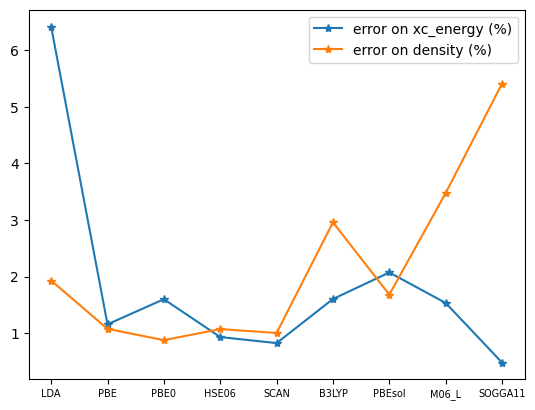

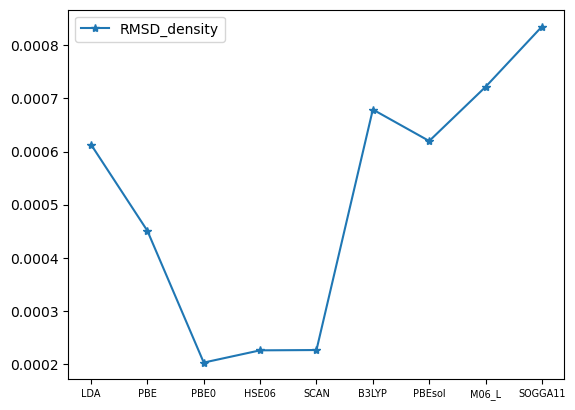

In [15]:
import matplotlib
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=10)

plt.plot(si_data_energ.index[1:], si_data_energ["PA_energ_error"][1:], marker="*",label="error on xc_energy (%)")
plt.plot(si_data_energ.index[1:], si_data_energ["PA_dens_error"][1:], marker="*",label="error on density (%)")
plt.legend()
plt.show()

plt.plot(si_data_energ.index[1:], si_data_energ["dens_RMSD"][1:], marker="*",label="RMSD_density")
plt.legend()
plt.show()


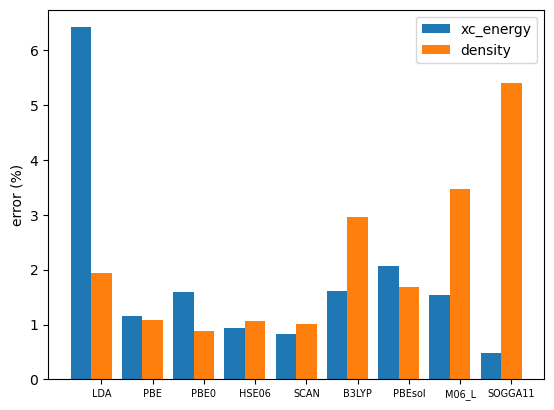

In [16]:
x=np.arange(len(si_data_energ.index[1:]) )
width=0.4             
plt.bar(x, si_data_energ["PA_energ_error"][1:],label="xc_energy",width=width)
plt.bar(x +width, si_data_energ["PA_dens_error"][1:], label="density",width=width)
plt.xticks(x+width , si_data_energ.index[1:])
plt.ylabel("error (%)")
plt.legend()
plt.show()


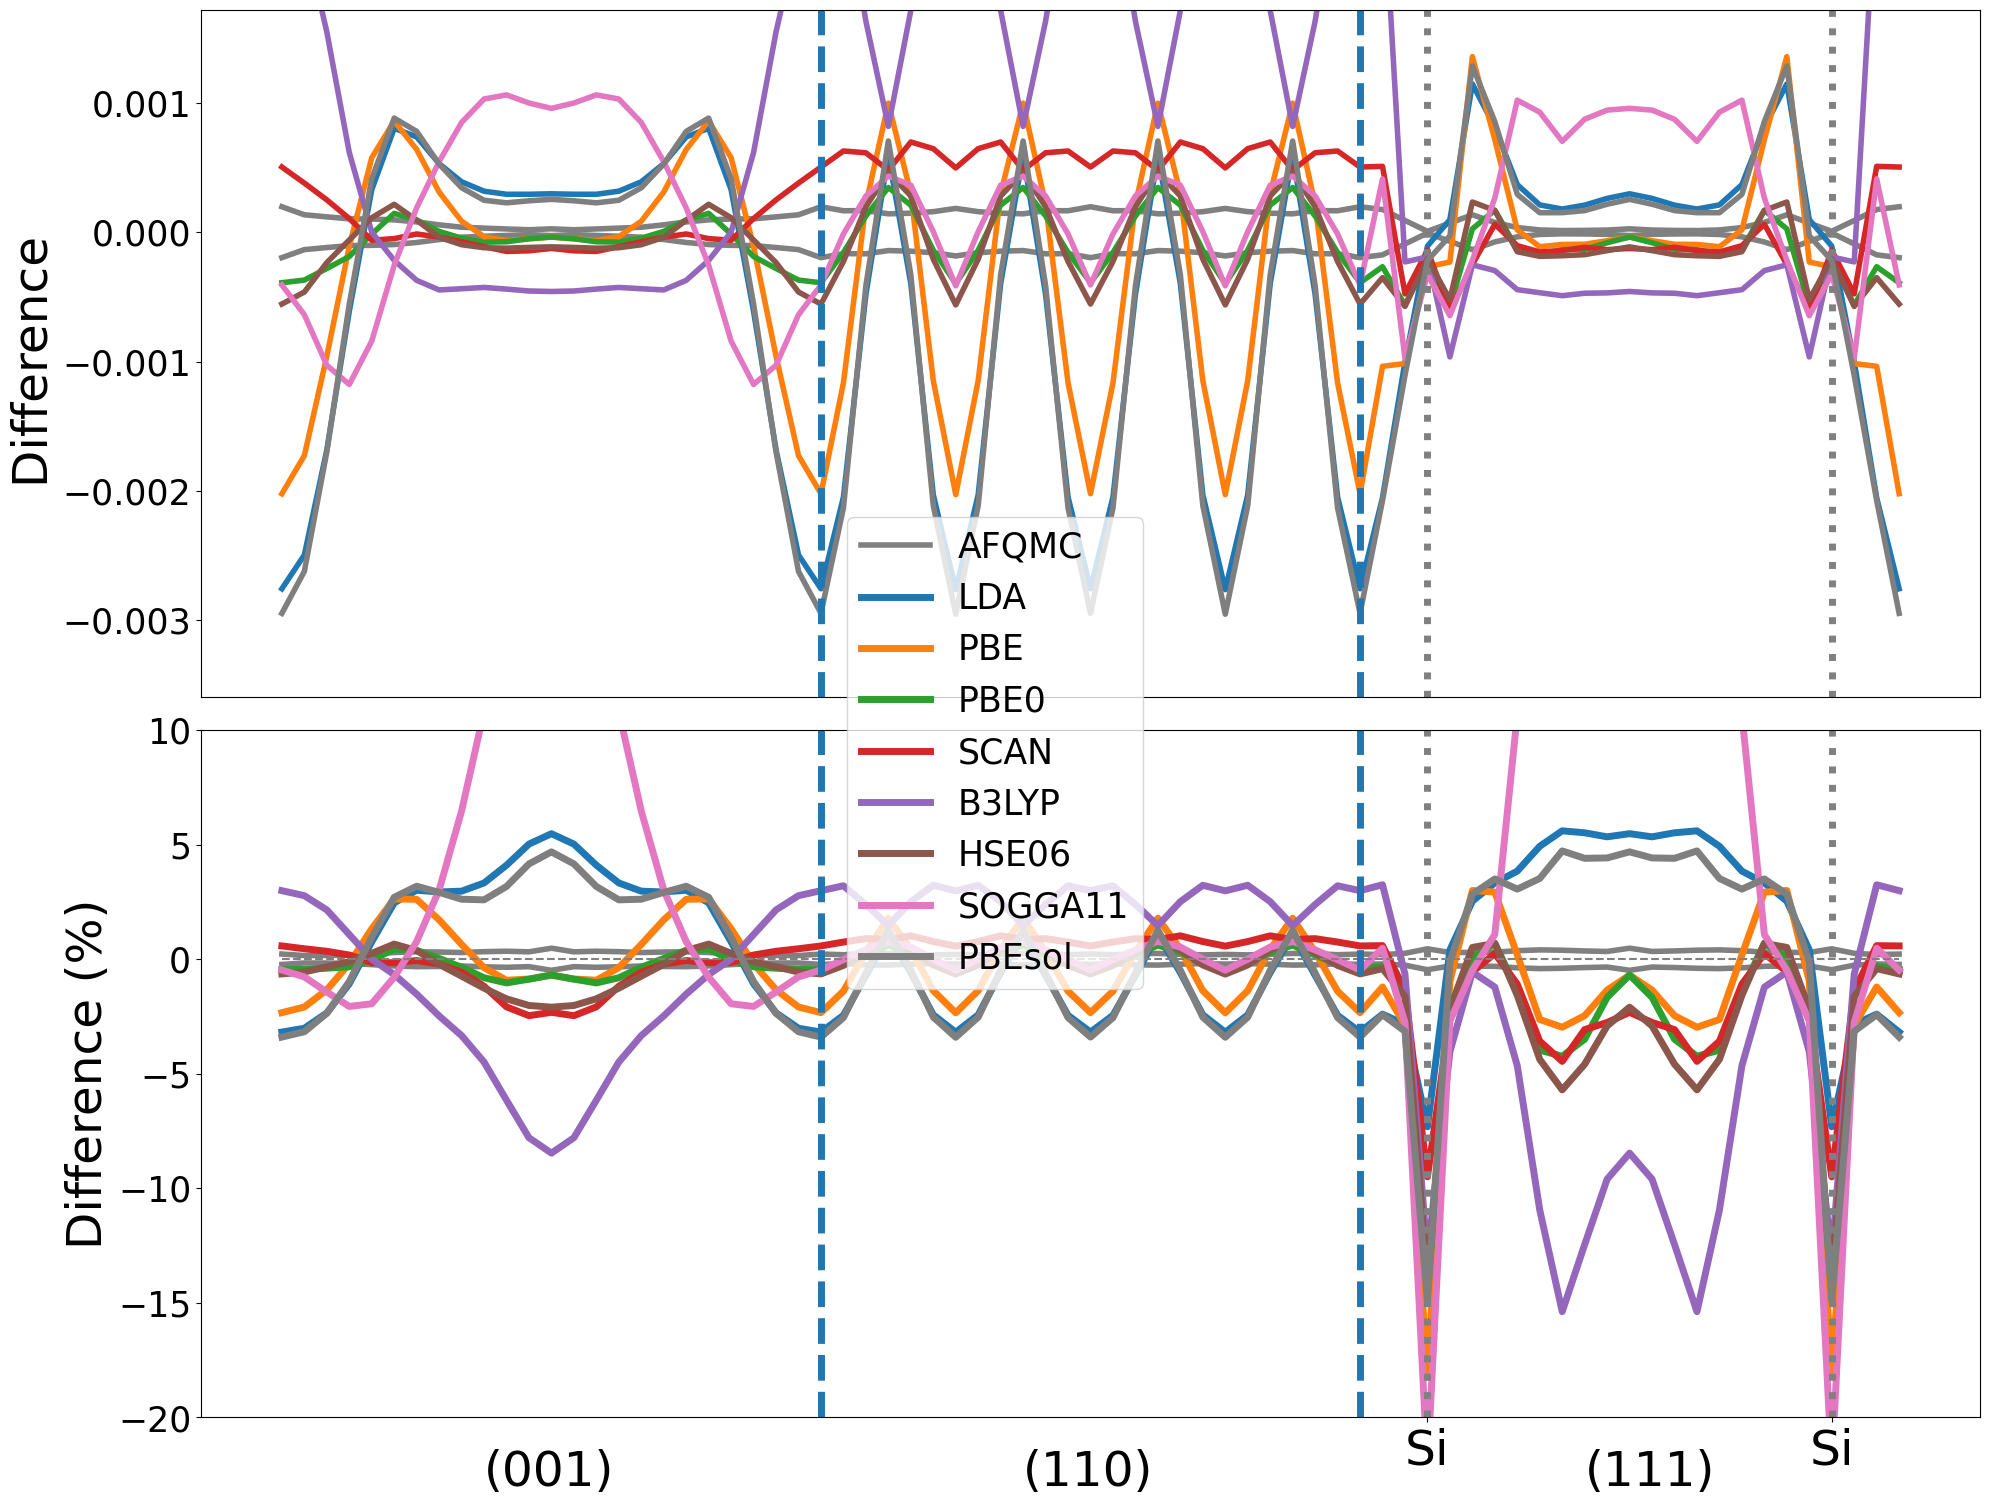

In [183]:
from plot_diff_si import * 

QMC= get_dens_inSD_si(dens_qmc)
erbar=get_dens_inSD_si(erbar_qmc)

diff_approx, diff_approx_name = [], []
for d in dict_dens: 
    hold=  get_dens_inSD_si(dict_dens[d])-QMC
    diff_approx.append(hold)
    diff_approx_name.append(d)
    
plot_diff_func(QMC, diff_approx, diff_approx_name,erbar, ymin=-20, ymax=10)

# NaCl 

In [38]:
nacl_data=pd.read_csv("nacl_qmc_dens_vxc.csv", index_col=0)
dens_qmc_nacl, erbar_qmc_nacl = nacl_data["density_qmc"].to_numpy(), nacl_data["erbar_qmc"].to_numpy()

In [44]:
nacl_data_energ= pd.DataFrame() 
nacl_data_energ["xc_energy_ev"],nacl_data_energ["PA_energ_error"]=[],[]
nacl_data_energ.loc["QMC", "xc_energy_ev"]=-246.83
nacl_data_energ.loc["LDA", "xc_energy_ev"]=-17.61535173 / 2 * 27.211
nacl_data_energ.loc["PW91", "xc_energy_ev"]=   -18.20212802  /2  *27.211
nacl_data_energ.loc["PBE", "xc_energy_ev"]=    -18.12181747 /2  *27.211 #-2.41671521437403E+00*27.211
nacl_data_energ.loc["PBEsol", "xc_energy_ev"]=   -17.82271686  /2  *27.211
nacl_data_energ.loc["SOGGA", "xc_energy_ev"]=    -17.65539057 /2  *27.211
nacl_data_energ.loc["BLYP", "xc_energy_ev"]=   -17.94448304  /2  *27.211

nacl_data_energ["PA_energ_error"]= 100* np.abs(nacl_data_energ["xc_energy_ev"]/nacl_data_energ.loc["QMC", "xc_energy_ev"]-1)

nacl_data_energ

,xc_energy_ev,PA_energ_error
QMC,-246.830000,0.000000
LDA,-239.665668,2.902537
PW91,-247.649053,0.331829
PBE,-246.556388,0.110851
PBEsol,-242.486974,1.759521
SOGGA,-240.210416,2.681839
BLYP,-244.143664,1.088334


In [45]:
dict_dens_nacl={}
for func in ["HSE", "PBE", "X3LYP", "BLYP", "PW91", "LDA", "PBEsol", "SOGGA"] :# HLE17 
    dict_dens_nacl[func]=np.genfromtxt("dens_{}_nacl.dat".format(func))

In [47]:
for func in dict_dens_nacl:
    nacl_data_energ.loc[func,"PA_dens_error"]= 100*np.mean(np.abs(dict_dens_nacl[func]/dens_qmc_nacl-1)) 
    nacl_data_energ.loc[func,"dens_RMSD"]= np.sqrt(np.mean((dict_dens_nacl[func]-dens_qmc_nacl)**2))

nacl_data_energ

,xc_energy_ev,PA_energ_error,PA_dens_error,dens_RMSD
QMC,-246.830000,0.000000,NaN,NaN
LDA,-239.665668,2.902537,4.951871,0.001220
PW91,-247.649053,0.331829,0.619107,0.000401
PBE,-246.556388,0.110851,0.740436,0.000399
PBEsol,-242.486974,1.759521,2.340462,0.000676
SOGGA,-240.210416,2.681839,1.855400,0.002565
BLYP,-244.143664,1.088334,1.094750,0.000393
HSE,NaN,NaN,1.349102,0.000478
X3LYP,NaN,NaN,1.164989,0.000276


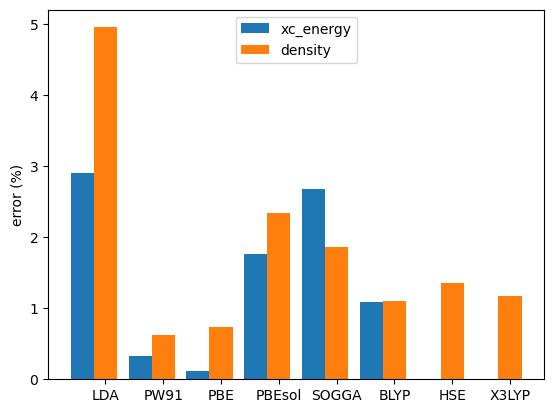

In [48]:
x=np.arange(len(nacl_data_energ.index[1:]) )
width=0.4             
plt.bar(x, nacl_data_energ["PA_energ_error"][1:],label="xc_energy",width=width)
plt.bar(x +width, nacl_data_energ["PA_dens_error"][1:], label="density",width=width)
plt.xticks(x+width , nacl_data_energ.index[1:])
plt.ylabel("error (%)")
plt.legend()
plt.show()
